# 🎥 Gesture Segmentation Tutorial
This notebook demonstrates the workflow for gesture segmentation using a pre-trained model. 
It will guide you through the steps to:

1. **Extract** 2‑D pose keypoints from a video using [MediaPipe Pose](https://developers.google.com/mediapipe).
2. **Segment** the extracted skeletons with the gesture‑segmentation models.
3. **Export** the result to ELAN for convenient manual inspection

Let's start👇

In [13]:
# --- Library imports----------------------------------------------------
import sys
import pandas as pd
from moviepy.editor import VideoFileClip
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

import os
import pathlib

# Local modules
from test_segmentation import (
    parse_args,
    set_random_seed,
    train_with_config,
    get_config,
)
from utils.extract_mp_pose import extract_keypoints

# Add project root to PYTHONPATH 
PROJECT_ROOT = pathlib.Path.cwd()
if PROJECT_ROOT.as_posix() not in sys.path:
    sys.path.append(PROJECT_ROOT.as_posix())

print("✅ Environment initialised")


✅ Environment initialised


In [2]:
# I use these commands to make the notebook interactive and automatically reload modified modules)
%load_ext autoreload
%autoreload 2
%matplotlib inline


## 1️⃣ Extract pose keypoints
Specify the path to **your** video file below.  
Set `save_video=True` if you would like an overlay video with the skeleton drawn on top.

**NOTE if you want to use your own webcam video**:
- Make sure you have a webcam connected to your computer.
- Change the `video_path` to `"0"` (zero) to use the webcam as input.


In [40]:
# Path to the video you want to analyse
video_path = "input_videos/salma_hayek_short.mp4"  # or specify a path to your video file
video_path = "input_videos/tedtalk.webm"  # Replace with your video file path
# video_path = 0 # ← use this to use your webcam as input

# Extract keypoints. The function returns a dictionary with useful metadata.
pose_data = extract_keypoints(
    vidf=video_path,
    save_video=True,
)

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
I0000 00:00:1750253035.909454 19862849 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M3 Pro


Video resolution: 1280.0x720.0, FPS: 25.0
Number of frames in the video: 22056


Processing frames:   0%|          | 0/22056 [00:00<?, ?frame/s]W0000 00:00:1750253035.971657 19902193 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750253036.002401 19902193 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750253036.005058 19902194 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750253036.005220 19902199 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750253036.005287 19902200 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750253036

The dictionary contains:

* `output_path` – `*.npy` file with the keypoints  
* `video_output_path` – overlay video (optional)  
* `samplerate` – frames‑per‑second of the processed clip

## 2️⃣ Run gesture segmentation

The script below will load and run the gesture segmentation model on the extracted keypoints.

In [41]:
# --- Build CLI‑style arguments ---------------------------------------------
sys.argv = [
    "run_segmentation_test.py",
    "--config",  "config/segmentation/CABB_segment_basic_test.yaml",
    "--poses-path", pose_data["output_path"],
    "--phase",  "test",
    "--seed",   "42",
    "--devices", "0",
    "--models_type", "best"
]

# --- Parse and run ----------------------------------------------------------
opts = parse_args()
set_random_seed(opts.seed)
cfg = get_config(opts.config)

print(f"=== Running segmentation on {opts.poses_path} ===")
segmentation_results = train_with_config(cfg, opts)


Seed set to 42


=== Running segmentation on input_videos/tedtalk.npy ===
Loading dataset...


Preparing segmentation sequences...: 100%|██████████| 1/1 [00:00<00:00, 3248.88it/s]
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at segmentation_models/fold_1/checkpoints/fold_1/best.ckpt
Loaded model weights from the checkpoint at segmentation_models/fold_1/checkpoints/fold_1/best.ckpt


[  0   1   2   3   6   9  10  11  12  13  14  15  16  17  19  20  21  22
  23  24  25  27  28  29  30  31  32  34  35  36  38  39  40  41  42  43
  44  46  47  48  49  50  51  52  53  54  56  57  58  59  62  64  65  67
  68  69  70  72  73  75  76  77  78  79  81  82  83  84  85  86  87  88
  91  92  93  95  96  97  99 100 101 102 103 104 105 107 108 109 111 113
 114 115 116 117 119 120 121 122 123 124 125 126 127 128 129 131 132 133
 134 135 136 137 139 140 141 142 143 144 146 147 148 149 151 152 153 154
 156 157 158 160 161 162 163 165 166 167 168 170 172 174 175 176 177 179
 181 182] [  4   5   7   8  18  26  33  37  45  55  60  61  63  66  71  74  80  89
  90  94  98 106 110 112 118 130 138 145 150 155 159 164 169 171 173 178
 180]
Starting Fold 1
INFO: Trainable parameter count: 3345161


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test/segmentation_loss   │    0.06291262060403824    │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at segmentation_models/fold_2/checkpoints/fold_2/best.ckpt
Loaded model weights from the checkpoint at segmentation_models/fold_2/checkpoints/fold_2/best.ckpt


[  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18  20
  21  23  25  26  28  29  31  32  33  34  35  36  37  38  39  41  42  43
  45  46  47  48  49  50  52  53  55  57  58  60  61  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  84  85  87
  88  89  90  91  93  94  95  98  99 100 101 102 103 104 105 106 107 109
 110 112 113 114 115 116 117 118 119 120 121 126 127 128 130 132 133 134
 137 138 140 141 142 143 144 145 147 148 150 151 152 153 154 155 156 157
 158 159 161 163 164 165 167 169 170 171 172 173 174 175 176 177 178 180
 181 182] [  2  16  19  22  24  27  30  40  44  51  54  56  59  62  83  86  92  96
  97 108 111 122 123 124 125 129 131 135 136 139 146 149 160 162 166 168
 179]
Starting Fold 2
INFO: Trainable parameter count: 3345161


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test/segmentation_loss   │    0.05727292224764824    │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at segmentation_models/fold_3/checkpoints/fold_3/best.ckpt
Loaded model weights from the checkpoint at segmentation_models/fold_3/checkpoints/fold_3/best.ckpt


[  0   1   2   4   5   6   7   8   9  11  12  14  16  17  18  19  21  22
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  42
  44  45  46  47  51  53  54  55  56  57  58  59  60  61  62  63  65  66
  67  68  70  71  72  74  75  77  79  80  81  82  83  84  86  87  88  89
  90  91  92  94  96  97  98  99 102 103 105 106 108 110 111 112 113 114
 115 117 118 119 120 122 123 124 125 127 128 129 130 131 132 133 134 135
 136 138 139 140 141 142 143 145 146 147 148 149 150 151 153 154 155 156
 157 158 159 160 161 162 164 165 166 168 169 171 172 173 174 177 178 179
 180 182] [  3  10  13  15  20  23  41  43  48  49  50  52  64  69  73  76  78  85
  93  95 100 101 104 107 109 116 121 126 137 144 152 163 167 170 175 176
 181]
Starting Fold 3
INFO: Trainable parameter count: 3345161


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test/segmentation_loss   │   0.058111194521188736    │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at segmentation_models/fold_4/checkpoints/fold_4/best.ckpt
Loaded model weights from the checkpoint at segmentation_models/fold_4/checkpoints/fold_4/best.ckpt


[  2   3   4   5   7   8   9  10  13  15  16  18  19  20  21  22  23  24
  25  26  27  29  30  31  32  33  36  37  39  40  41  43  44  45  47  48
  49  50  51  52  54  55  56  58  59  60  61  62  63  64  66  67  69  70
  71  72  73  74  76  77  78  79  80  81  82  83  85  86  87  88  89  90
  92  93  94  95  96  97  98  99 100 101 103 104 106 107 108 109 110 111
 112 115 116 117 118 121 122 123 124 125 126 127 129 130 131 135 136 137
 138 139 140 142 144 145 146 147 148 149 150 151 152 154 155 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182] [  0   1   6  11  12  14  17  28  34  35  38  42  46  53  57  65  68  75
  84  91 102 105 113 114 119 120 128 132 133 134 141 143 153 156 157 158]
Starting Fold 4
INFO: Trainable parameter count: 3345161


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test/segmentation_loss   │    0.05671367794275284    │
└───────────────────────────┴───────────────────────────┘

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at segmentation_models/fold_5/checkpoints/fold_5/best.ckpt
Loaded model weights from the checkpoint at segmentation_models/fold_5/checkpoints/fold_5/best.ckpt


[  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  19  20  22  23  24  26  27  28  30  33  34  35  37  38  40  41  42  43
  44  45  46  48  49  50  51  52  53  54  55  56  57  59  60  61  62  63
  64  65  66  68  69  71  73  74  75  76  78  80  83  84  85  86  89  90
  91  92  93  94  95  96  97  98 100 101 102 104 105 106 107 108 109 110
 111 112 113 114 116 118 119 120 121 122 123 124 125 126 128 129 130 131
 132 133 134 135 136 137 138 139 141 143 144 145 146 149 150 152 153 155
 156 157 158 159 160 162 163 164 166 167 168 169 170 171 173 175 176 178
 179 180 181] [  9  21  25  29  31  32  36  39  47  58  67  70  72  77  79  81  82  87
  88  99 103 115 117 127 140 142 147 148 151 154 161 165 172 174 177 182]
Starting Fold 5
INFO: Trainable parameter count: 3345161


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test/segmentation_loss   │    0.06128457561135292    │
└───────────────────────────┴───────────────────────────┘

Saving results to CABB_Segmentation/fold_5/test_results.pkl


## 3️⃣ Export to ELAN
Convert the raw segment list into an ELAN tier.  
Afterwards you can open the generated `.eaf` file alongside the overlay video to inspect the automatic segmentation.

In [42]:
from utils.Gesture_Segmentation_to_ELAN import process_and_save_all

segmenation_results_per_frame = process_and_save_all(
    segmentation_results.copy(),
    fps=pose_data["samplerate"],
    model="skeleton",
    threshold=0.55,
    media_path=pose_data["video_output_path"],
    elan_template=pose_data['video_output_path'].replace(".mp4", ".eaf"),
    smoothing_window=40,

)
print("✅ Finished – ELAN file ready!")


100%|██████████| 1/1 [00:25<00:00, 25.08s/it]

ELAN file saved: input_videos/tedtalk_output.eaf
✅ Finished – ELAN file ready!


In [43]:
segmenation_results_per_frame

,label,pair_speaker,start_frame,end_frame,pred_n,pred_g,gesture_prob,gesture_bin,speaker
0,0,077_B,0,120,0.762365,-0.702865,0.187669,False,B
1,0,077_B,0,120,0.765769,-0.707083,0.186509,False,B
2,0,077_B,0,120,0.754440,-0.694604,0.190149,False,B
3,0,077_B,0,120,0.754876,-0.693136,0.190308,False,B
4,0,077_B,0,120,0.763194,-0.707352,0.186860,False,B
...,...,...,...,...,...,...,...,...,...
21955,0,077_B,21840,21960,0.194826,-0.227684,0.395916,False,B
21956,0,077_B,21840,21960,0.199339,-0.214436,0.398007,False,B
21957,0,077_B,21840,21960,0.181707,-0.197534,0.406310,False,B
21958,0,077_B,21840,21960,0.167787,-0.188664,0.411819,False,B


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


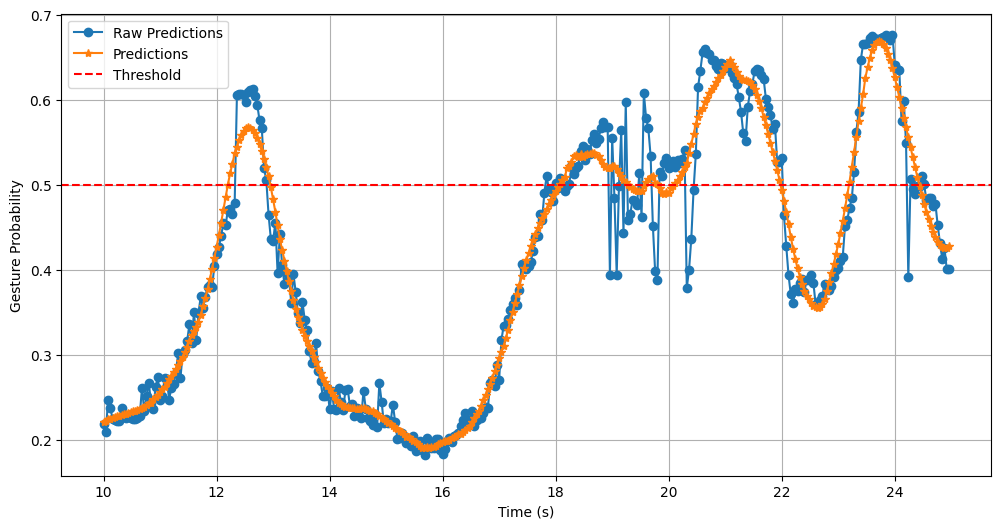

In [59]:

def display_segmented_clip(
    df: pd.DataFrame,
    pair_speaker: str,
    from_ts: float,
    to_ts: float,
    videos_path: str,
    fps: int = pose_data["samplerate"]
) -> None:
    """
    Display a video subclip with per-frame segmentation overlay.

    Args:
        df: DataFrame with 'gesture_bin' column.
        pair_speaker: e.g. '077_B'.
        from_ts: start time (seconds).
        to_ts: end time (seconds).
        videos_path: path template, use videos_path.format(pair, speaker).
        fps: frames per second.
    """
    pair, speaker = pair_speaker.split('_')
    video_path = videos_path.format(pair, speaker)
    clip = VideoFileClip(video_path).subclip(from_ts, to_ts).resize(width=500)

    # Extract binary mask for this speaker
    df_ps = df[df['pair_speaker'] == pair_speaker].reset_index(drop=True)
    start_frame = int(from_ts * fps)
    end_frame = int(to_ts * fps)
    mask = df_ps['gesture_bin'].values[start_frame:end_frame]

    def annotate_frame(frame, t):
        idx = int((t) * fps)
        if idx < len(mask) and mask[idx]:
            # Draw red border when gesture is present
            frame[[0, -1], :] = [255, 0, 0]
            frame[:, [0, -1]] = [255, 0, 0]
        return frame
    gesture_prob = df_ps['gesture_prob'].values[start_frame:end_frame]
    annotated = clip.fl_image(lambda frame: annotate_frame(frame, clip.reader.pos / fps))
    display(annotated.ipython_display(verbose=False, embed=True))
    # Time points for the new data
    time_points_new = np.arange(len(gesture_prob))

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_smoothed_predictions(
    gesture_prob: np.ndarray,
    smoothing_window: int = 40,
    polyorder: int = 3
) -> np.ndarray:
    """
    Smooth a 1D prediction series using a Savitzky-Golay filter.

    Args:
        gesture_prob: Raw gesture probability array.
        smoothing_window: Window length (must be odd and <= len(gesture_prob)).
        polyorder: Polynomial order for smoothing.

    Returns:
        Smoothed prediction array.
    """
    # Ensure odd window length and <= data length
    window = min(smoothing_window, len(gesture_prob))
    if window % 2 == 0:
        window -= 1
    if window < polyorder + 2:
        window = polyorder + 2 + (1 - ((polyorder + 2) % 2))  # make it odd
    window = min(window, len(gesture_prob))
    return savgol_filter(gesture_prob, window_length=window, polyorder=polyorder)


def display_smoothed_plot(
    df: pd.DataFrame,
    pair_speaker: str,
    from_ts: float,
    to_ts: float,
    fps: int = pose_data["samplerate"],
    threshold: float = 0.55
) -> None:
    """
    Plot raw and smoothed gesture probabilities over a time segment.

    Args:
        df: DataFrame with 'gesture_prob'.
        pair_speaker: e.g. '077_B'.
        from_ts: start time (seconds).
        to_ts: end time (seconds).
        fps: frames per second.
    """
    # Subset and extract
    df_ps = df[df['pair_speaker'] == pair_speaker].reset_index(drop=True)
    start_frame = int(from_ts * fps)
    end_frame = int(to_ts * fps)
    gesture_prob = df_ps['gesture_prob'].values[start_frame:end_frame]

    # Smooth
    smoothed = plot_smoothed_predictions(gesture_prob)

    # Build time axis
    times = np.arange(start_frame, end_frame) / fps

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(times, gesture_prob, label='Raw Predictions', linestyle='-', marker='o')
    plt.plot(times, smoothed, label='Predictions', linestyle='-', marker='*')
    # plot the threshold line
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.xlabel('Time (s)')
    plt.ylabel('Gesture Probability')
    # plt.title(f'Gesture Predictions (Raw vs Smoothed) for {pair_speaker}')
    plt.legend()
    plt.grid(True)
    plt.show()


from_ts = 10
to_ts = 25
# Display smoothed predictions for a specific segment
# Display a subclip with segmentation overlay
display_segmented_clip(
    df=segmenation_results_per_frame,
    pair_speaker="077_B",
    from_ts=from_ts,
    to_ts=to_ts,
    videos_path=pose_data["video_output_path"],
    fps=pose_data["samplerate"]
)
display_smoothed_plot(
    df=segmenation_results_per_frame,
    pair_speaker="077_B",
    from_ts=from_ts,
    to_ts=to_ts,
    fps=pose_data["samplerate"],
    threshold=0.50,
)


## 📝 Exercise 1: Compare Model Checkpoints

In Step 2️⃣ you can swap the `--models_type` argument between `"best"` and `"last"` to observe how the segmentation changes.  

1. **Edit the CLI args** below (Cell 7) to select your model:
    ```python
    sys.argv = [
         "run_segmentation_test.py",
         "--config",       "config/segmentation/CABB_segment_basic_test.yaml",
         "--poses-path",   pose_data["output_path"],
         "--phase",        "test",
         "--seed",         "42",
         "--devices",      "0",
         "--models_type",  "last"    # ← try "best" or "last"
    ]
    ```
2. **Rerun Cell 7** and all following cells to regenerate the ELAN file.
3. **Open the `.eaf`** in ELAN alongside the overlay video to compare.

**Discussion Questions**
- 🔍 What differences do you notice between the `"best"` and `"last"` checkpoints?
- 📈 Are the results substantially different?
- 🤔 Does the accuracy of your pose keypoint extraction impact results more than the chosen model checkpoint?

```markdown
## 📝 Exercise 2: Compare Threshold Values

The threshold value determines how confident the model must be to classify a frame as a gesture. In Step 3️⃣ you can adjust the `threshold` parameter in the `get_elan_files` call to see how it affects segmentation.

1. **Edit the threshold** below in step 3️⃣ to try different values, e.g.:
   ```python
   get_elan_files(
      segmentation_results.copy(),
      fps=pose_data["samplerate"],
      model="skeleton",
      threshold=0.45,  # ← try 0.45, 0.50, 0.55, and 0.6.
      file_path=pose_data["output_path"],
      video_output_path=pose_data["video_output_path"],
   )
   ```
2. **Rerun the Cell** (and any following cells) to regenerate the ELAN file.
3. **Open the `.eaf`** in ELAN alongside the overlay video to compare how different thresholds change segment boundaries.

**Discussion Questions**
- 🔍 How does lowering or raising the threshold impact the number of detected segments?
- 📈 Does a more permissive threshold (lower) introduce more false positives?
- 🤔 Which threshold gives the most meaningful segmentation for your video?
```